# **Task 8**

## Question 1

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od

In [3]:
path = od.download("https://www.kaggle.com/datasets/sakshisatre/titanic-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sakshisatre/titanic-dataset


100%|██████████| 59.2k/59.2k [00:00<00:00, 98.3MB/s]

In [4]:
df = pd.read_csv('/content/titanic-dataset/The Titanic dataset.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [5]:
cols = df.loc[0].values

df.drop(0, inplace = True)
df.columns = cols
df.reset_index(drop = True, inplace = True )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sn        1301 non-null   object
 1   pclass    1301 non-null   object
 2   survived  1301 non-null   object
 3   nan       1301 non-null   object
 4   gender    1300 non-null   object
 5   age       1044 non-null   object
 6   family    1299 non-null   object
 7   fare      1299 non-null   object
 8   embarked  1295 non-null   object
 9   date      1301 non-null   object
dtypes: object(10)
memory usage: 101.8+ KB


In [7]:
df.describe(include=["object"])

,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
count,1301,1301,1301,1301,1300,1044,1299,1299,1295,1301
unique,1300,3,2,1297,2,97,9,282,3,1300
top,1,3,0,Mr. Anthony,male,24,0,13,S,01-Jan-90
freq,2,700,801,2,835,47,781,59,905,2


In [10]:
df['survived'] = df['survived'].astype(np.int64)


In [12]:
df['family'] = df['family'] != "NaN"
df['family'] = df['family'].astype(np.int64)

In [13]:
df['fare'] = df['fare'] != "**"

In [14]:
df['fare'] =df['fare'].astype(np.float64)

In [15]:
df['age'] = df['age'] != "?"

In [16]:
df['age'] = df['age'].astype(np.int64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1301 non-null   object 
 1   pclass    1301 non-null   object 
 2   survived  1301 non-null   int64  
 3   nan       1301 non-null   object 
 4   gender    1300 non-null   object 
 5   age       1301 non-null   int64  
 6   family    1301 non-null   int64  
 7   fare      1301 non-null   float64
 8   embarked  1295 non-null   object 
 9   date      1301 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 101.8+ KB


In [18]:
df.isna().sum()

,0
sn,0
pclass,0
survived,0
NaN,0
gender,1
age,0
family,0
fare,0
embarked,6
date,0


In [19]:
df.gender.fillna(df.gender.median, inplace = True)

In [20]:
df['fare'].std()

0.027724348650070996

In [21]:
df.fillna(df.fare.mean(), inplace = True)

In [22]:
df['family'] = df.family.fillna(df.family.median())
df.isna().sum()

,0
sn,0
pclass,0
survived,0
NaN,0
gender,0
age,0
family,0
fare,0
embarked,0
date,0


## Question 2

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [25]:
od.download("https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set


100%|██████████| 4.66k/4.66k [00:00<00:00, 9.61MB/s]

In [27]:
df = pd.read_csv("/content/car-evaluation-data-set/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
df.columns = [['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'values']]

In [29]:
df.columns

MultiIndex([(  'buying',),
            (   'maint',),
            (   'doors',),
            ( 'persons',),
            ('lug_boot',),
            (  'safety',),
            (  'values',)],
           )

In [30]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df.iloc[:, [0,1, 6]])

encoded_df = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())
df = df.drop(columns = ['buying', 'maint', 'values'])

df = pd.concat([encoded_df, df], axis = 1)

/tmp/ipython-input-32453494.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns = ['buying', 'maint', 'values'])


In [31]:
df.head()

,x0_high,x0_low,x0_med,x0_vhigh,x1_high,x1_low,x1_med,x1_vhigh,x2_acc,x2_good,x2_unacc,x2_vgood,"(doors,)","(persons,)","(lug_boot,)","(safety,)"
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,small,med
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,small,high
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,med,low
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,med,med
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,med,high


In [32]:
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

df = df.rename(columns={
    'x0_high': 'buying_high',
    'x0_low': 'buying_low',
    'x0_med': 'buying_med',
    'x0_vhigh': 'buying_vhigh',
    'x1_high': 'maint_high',
    'x1_low': 'maint_low',
    'x1_med': 'maint_med',
    'x1_vhigh': 'maint_vhigh',
    'x2_acc': 'class_acc',
    'x2_good': 'class_good',
    'x2_unacc': 'class_unacc',
    'x2_vgood': 'class_vgood',
    '(doors,)': 'doors',
    '(persons,)': 'persons',
    '(lug_boot,)': 'lug_boot',
    '(safety,)': 'safety'
})


In [33]:
encoder = LabelEncoder()
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])

encoder = LabelEncoder()
df['safety'] = encoder.fit_transform(df['safety'])

In [34]:
df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,class_acc,class_good,class_unacc,class_vgood,doors,persons,lug_boot,safety
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,2,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,2,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,1,2
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,2,1,0


## Question 3

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [39]:
od.download("https://www.kaggle.com/datasets/rajyellow46/wine-quality")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rajyellow46/wine-quality


100%|██████████| 98.0k/98.0k [00:00<00:00, 141MB/s]

In [41]:
df = pd.read_csv("/content/wine-quality/winequalityN.csv", delimiter = ",")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
df.drop(columns = 'type', inplace = True)

In [44]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,0.207999
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,0.207999
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,0.207999
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999


In [45]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled_min = pd.DataFrame(scaled, columns = df.columns)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558,0.207999
1,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615,0.207999
2,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521,0.207999
3,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999
4,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219,0.207999


## Question 4

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
od.download("https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd


100%|██████████| 4.35k/4.35k [00:00<00:00, 8.79MB/s]

In [48]:
df = pd.read_csv("/content/bostonhoustingmlnd/housing.csv", delimiter = ",")

In [49]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [50]:
iqr1 = df.quantile(0.25)
iqr2 = df.quantile(0.75)
iqr = iqr1 - iqr2
outliers = (df < (iqr1 - 1.5 * iqr)) | (df > (iqr2 + 1.5 * iqr))

print(outliers)

       RM  LSTAT  PTRATIO  MEDV
0    True   True     True  True
1    True   True     True  True
2    True   True     True  True
3    True   True     True  True
4    True   True     True  True
..    ...    ...      ...   ...
484  True   True     True  True
485  True   True     True  True
486  True   True     True  True
487  True   True     True  True
488  True   True     True  True

[489 rows x 4 columns]


In [51]:
z_score = df - df.mean()/df.std()
z_score.head()

,RM,LSTAT,PTRATIO,MEDV
0,-3.120161,3.152882,6.529646,503997.252073
1,-3.274161,7.312882,9.029646,453597.252073
2,-2.510161,2.202882,9.029646,728697.252073
3,-2.697161,1.112882,9.929646,701397.252073
4,-2.548161,3.502882,9.929646,760197.252073


<Axes: xlabel='RM', ylabel='MEDV'>

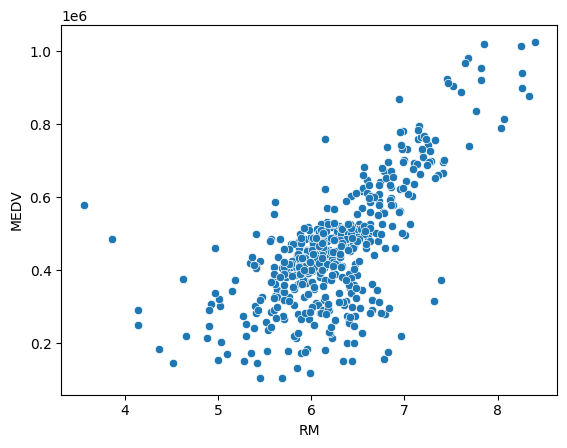

In [52]:
sns.scatterplot(x =  'RM', y = 'MEDV', data = df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

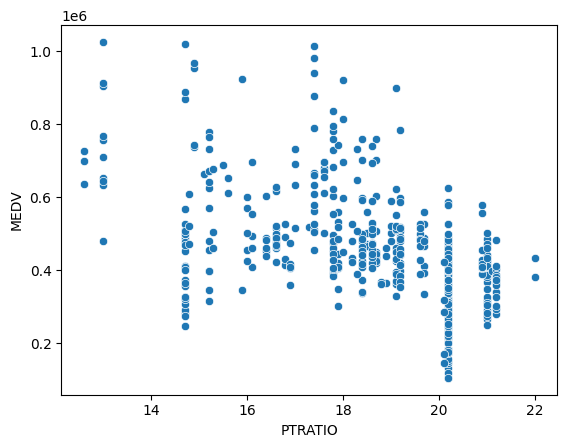

In [53]:
sns.scatterplot(x = 'PTRATIO', y= 'MEDV', data = df)

## Question 5

## Question 6

In [54]:
od.download("https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


100%|██████████| 12.4k/12.4k [00:00<00:00, 21.4MB/s]

In [55]:
df = pd.read_csv("/content/heart-disease-data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [57]:
df['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76, 28, 30, 31, 32, 33, 36, 72, 73, 75])

In [58]:
bins = [0, 40, 50, 60, 70]
labels = ["Forties", "Fifties", "Sixties", "Seventies",]
df['age group'] = pd.cut(df['age'], bins = bins, labels = labels)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Seventies
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Seventies
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Seventies
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Forties
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Fifties


In [59]:
df['Danger level'] = (df['trestbps'] * df['chol'] )/(120 * 170)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age group,Danger level
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Seventies,1.656127
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Seventies,2.243137
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Seventies,1.347059
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Forties,1.593137
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Fifties,1.300000


## Question 7

In [60]:
od.download("https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset


100%|██████████| 286k/286k [00:00<00:00, 321MB/s]

In [64]:
df = pd.read_csv("/content/bike-sharing-dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
import scipy.stats as sp

In [66]:
df['log transformed casual'] = np.log(df['casual'])

In [67]:
df['rooted registered'] = np.sqrt(df['registered'])

In [68]:
df['boxcox count'], val = sp.boxcox(df['cnt'])

In [69]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,log transformed casual,rooted registered,boxcox count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5.802118,25.573424,498.358869
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,4.875197,25.884358,414.955637
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,4.787492,35.057096,658.336374
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4.682131,38.131352,749.533462
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4.406719,38.961519,765.645544


## Question 8

In [70]:
od.download("https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


100%|██████████| 8.91k/8.91k [00:00<00:00, 28.6MB/s]

In [85]:
df = pd.read_csv("/content/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

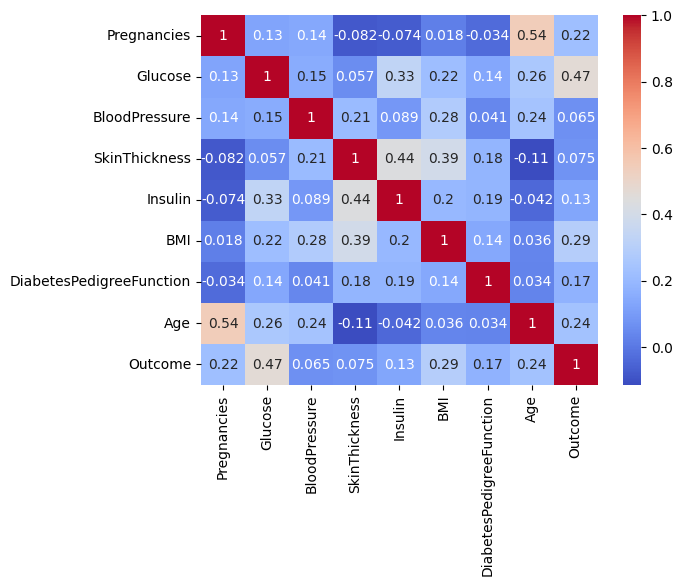

In [86]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [73]:
df.drop(['SkinThickness', 'BloodPressure'],axis = 1, inplace = True)

## Question 9

In [74]:
from imblearn.over_sampling import SMOTE,ADASYN

In [75]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: ahsanatiq98
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 1.21GB/s]

In [76]:
df = pd.read_csv("/content/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [77]:
X = df.drop(columns = 'Class')
y = df['Class'].astype(np.int64)

In [78]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [79]:
print(df.shape)
print(X_sm.shape)

(284807, 31)
(568630, 30)


In [80]:
adasyn = ADASYN()
X_ad, y_ad = adasyn.fit_resample(X, y)

In [81]:
print(X_ad.shape)

(568613, 30)


In [82]:
X_sm.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
mean,87855.305074,-2.473377,1.911315,-3.644480,2.325976,-1.626135,-0.715743,-2.920351,0.273529,-1.327778,...,0.184282,0.396672,-0.008968,-0.002776,-0.055160,0.025556,0.028364,0.080817,0.041304,96.043376
std,48125.906296,5.443766,3.630769,6.148750,3.142462,4.127543,1.704903,5.702547,4.946470,2.222777,...,1.032242,2.845004,1.164484,1.012743,0.540085,0.612690,0.447637,0.950910,0.418743,221.040477
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,46094.507682,-3.057467,-0.098723,-5.228666,-0.055241,-1.821869,-1.550625,-3.241290,-0.197675,-2.318775,...,-0.188642,-0.158339,-0.500398,-0.223405,-0.384242,-0.303397,-0.266629,-0.067587,-0.057245,3.380000
50%,80306.505034,-0.818375,1.016992,-1.551257,1.484869,-0.445631,-0.693120,-0.750699,0.168319,-0.808313,...,0.039461,0.161532,0.021212,-0.026216,-0.008264,0.044193,-0.006835,0.058329,0.036671,25.000000
75%,134772.024909,0.824033,2.888490,0.268238,4.341895,0.429613,0.025063,0.187628,0.854408,0.078930,...,0.434764,0.648454,0.526667,0.188103,0.339248,0.367417,0.307620,0.432938,0.213673,99.990000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [83]:
X_ad.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,...,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000,568613.000000
mean,88601.709444,-2.122662,1.668331,-3.257448,2.213533,-1.336464,-0.684976,-2.509292,0.333325,-1.243630,...,0.203061,0.214587,0.043518,-0.024959,-0.067056,0.018134,0.032141,0.104414,0.041646,98.150765
std,48480.884610,4.962843,3.319024,5.626005,3.043829,3.755853,1.565618,5.144515,3.764645,2.135252,...,0.988905,1.886892,0.921627,0.929249,0.538581,0.601249,0.447371,0.860666,0.410303,223.000178
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,46816.000000,-2.715059,-0.113120,-4.868923,-0.059171,-1.611774,-1.469103,-2.909927,-0.197596,-2.157460,...,-0.181708,-0.162661,-0.483710,-0.214706,-0.389896,-0.302730,-0.270995,-0.062470,-0.054898,3.570000
50%,80368.792219,-0.775323,0.978065,-1.490785,1.442577,-0.401336,-0.672789,-0.717430,0.161334,-0.791922,...,0.044627,0.150910,0.024788,-0.024522,-0.021323,0.041472,0.003615,0.062619,0.037945,25.150000
75%,135370.000000,0.849084,2.657030,0.273458,4.147511,0.452605,0.022183,0.198888,0.805425,0.091441,...,0.429603,0.597198,0.527119,0.188295,0.312022,0.366624,0.311018,0.427666,0.210016,99.990000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


## Question 10